# Norm and distance

## Norm

**Norm.** The norm $\|x\|$ can be computed in Python using *np.linalg.norm(x)*. (It can be evaluated in several other ways too.) The *np.linalg.norm* function is contained in the numpy package linalg.

In [2]:
import numpy as np

In [3]:
x = np.array([2,-1,2])
print(np.linalg.norm(x))

3.0


In [4]:
print(np.sqrt(np.inner(x,x)))

3.0


In [6]:
print((sum(x**2)**0.5))

3.0


**Triangle inequality.** Let's check the triangle inequality, $\|x + y\| \le \|x\| + \|y\|$, for some specific values of $x$ and $y$.

In [7]:
x = np.random.random(10)
y = np.random.random(10)
LHS = np.linalg.norm(x+y)
RHS = np.linalg.norm(x) + np.linalg.norm(y)
print(f'LHS: {LHS}')
print(f'RHS: {RHS}')

LHS: 2.929257867665516
RHS: 3.160278501924304


**RMS value.** The RMS value of a vector x is $rms(x) = \|x\| \sqrt{n}$. In Python, this is expressed as **np.linalg.norm(x)/np.sqrt(len(x))**. Let's define a vector (which represents a signal, i.e. the value of some quantity at uniformly space time instances), and find its RMS value.

In [8]:
rms = lambda x: (sum(x**2)**0.5)/(len(x)**0.5)
t = np.arange(0,1.01,0.01)
x = np.cos(8*t) - 2*np.sin(11*t)
print(sum(x)/len(x))

-0.042529437832386836


In [10]:
print(rms(x))

1.0837556422598


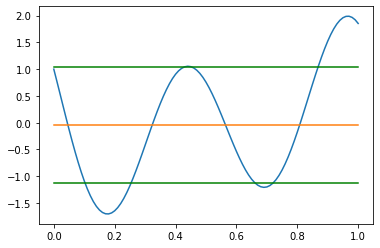

In [9]:
import matplotlib.pyplot as plt
plt.ion()
plt.plot(t,x)
plt.plot(t, np.mean(x)*np.ones(len(x)))
plt.plot(t, (np.mean(x) + rms(x))*np.ones(len(x)), 'g')
plt.plot(t, (np.mean(x) - rms(x))*np.ones(len(x)), 'g')
plt.show()

**Chebyshev inequality.** The Chebyshev inequality states that the number of entries of an n-vector x that have absolute value at least a is no more than $\|x\|^2/a^2 = n*rms(x)^2/a^2$. If the number is, say, 12.15, we can conclude that no more than 12 entries have absolute value at least a, since the number of entries is an integer. So the Chebyshev bound can be improved to be $floor(\|x^2\|/a)$, where $floor(u)$ is the integer part of a positive number. Let's define a function with the Chebyshev bound, including the floor function improvement, and apply the bound to the signal found above, for a specific value of a.

In [11]:
# Define Chebyshev bound function
import math
cheb_bound = lambda x,a: math.floor(sum(x**2)/a)
a = 1.5
print(cheb_bound(x,a))

79


In [12]:
# Number of entries of x with |x_i| >= a
print(sum(abs(x) >= a))

20
